# Fake News Detector

## Installing Necessary Libraries
 #### Other Libraies Which are required imported on that cell

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [5]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

### Data Preview 

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#### - In Both Cases We Can See That There No Targeted Column So We Have To Create One
#### - We'll Add New Column Name "Class" 
#### - We Know data_fake Contain Only Fake News So We'll add Value ' 0 '
#### - Similarly data_true Contain Only True News So We'll add Value ' 1 '

### Adding New Column Which is Target

In [6]:
data_fake["class"]=0
data_true['class']=1

In [8]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [9]:
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
data_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


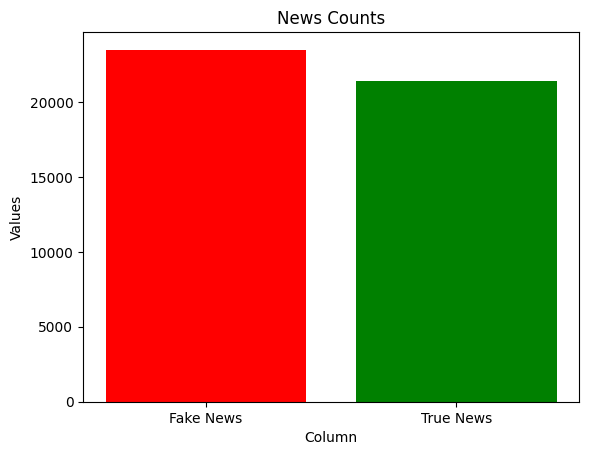

In [13]:
count=[data_fake["class"].shape[0], data_true["class"].shape[0]]
name=["Fake News","True News"]
plt.bar(name,count,color=["red", "green"])
plt.xlabel("Column")
plt.ylabel("Values")
plt.title("News Counts")
plt.show()

#### - Here We Can See FAke News Are More Than True News

### Merging True_data & Fake_data  

In [14]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### "title", "subject" and "date" columns is not required for detecting the fake news.

In [13]:
data_merge.keys()

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

### We only require "text" & "class" Columns

In [15]:
data=data_merge[['text','class']]

In [16]:
#count of missing values
data.isnull().sum() 

text     0
class    0
dtype: int64

### We Don't Have Any **Null** Values

### Randomly shuffling the dataframe 
#### - Merged data Are Stacked 
#### - So We Shuffule it For Better Splitting

In [16]:
data = data.sample(frac = 1)

In [18]:
data.head()

,text,class
9393,Wow! Poor Kathy Griffin The toxic comedian f...,0
12437,,0
12178,BRUSSELS (Reuters) - European Union leaders ap...,1
19205,Nordstrom cancelled the Ivanka Trump line afte...,0
10730,FOX News is announcing that President Trump be...,0


### ReIndexing

In [17]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [20]:
data.head()

,text,class
0,Wow! Poor Kathy Griffin The toxic comedian f...,0
1,,0
2,BRUSSELS (Reuters) - European Union leaders ap...,1
3,Nordstrom cancelled the Ivanka Trump line afte...,0
4,FOX News is announcing that President Trump be...,0


## Preprocessing Text

#### - Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.
#### - Only Keep Text Which Required To Train model

In [21]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

### Applying Clean_text Function To Text Column

In [22]:
data['text'] = data['text'].apply(clean_text)

### Defining dependent and independent variable as x and y

In [23]:
x = data['text']
y = data['class']

## Training the model

#### - Splitting the dataset into training set and testing set. 
#### - Spliting into (75% - 25%) Train - Test Resp.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

### Extracting Features from the Text

#### - Convert text to vectors

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression(max_iter=100)
LR.fit(xv_train, y_train)
pred_lr = LR.predict(xv_test)

### Accuracy Score Of LogisticRegression

In [29]:
LR.score(xv_test, y_test)

0.9877896613190731

### Classification Report Of LogistiRegression

In [30]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5859
           1       0.98      0.99      0.99      5366

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)

### Accuracy of DecisionTree

In [33]:
DT.score(xv_test, y_test)

0.9947438752783965

### Classification Report Of DecisionTree

In [34]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5859
           1       0.98      0.99      0.99      5366

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



## Gradient Boost Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)
pred_gb = GB.predict(xv_test)

### Accuracy of GradientBoost

In [38]:
GB.score(xv_test, y_test)

0.9951893095768374

### Classification Report Of GradientBoost

In [39]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5859
           1       0.99      1.00      0.99      5366

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [40]:
pred_rf = RF.predict(xv_test)

### Accuracy of RandomForest

In [41]:
RF.score(xv_test, y_test)

0.9869875222816399

### Classification Report Of RandomForest

In [42]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5834
           1       0.99      0.98      0.99      5386

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Conclusion
### Gradient Boosting:
#### - Accuracy ≈ 100%
#### - Precision/Recall/F1 all ≈ 1.00
#### - Gradient Boosting performed the best, achieving perfect classification on the test dataset.
### Random Forest:
#### - Accuracy ≈ 98.7%
#### - Precision/Recall/F1 ≈ 0.99
#### - Random Forest also performed extremely well with almost 99% accuracy.


### All Models Works Very Well !